<img src="Separator.png" alt="drawing"/>


<div style="text-align: center; background-color: #f0f0f0; padding: 20px; border-radius: 10px;">

<p style="text-align: center;"> Національний університет “Чернігівська політехніка”</p>

# Використання онлайн інструментів на базі Python

<p style="text-align: center; color: #B0B0B0;"> <i> В рамках програми підвищення кваліфікації </i> </p>
<p style="text-align: center; color: #B0B0B0;"> <i> "ДИСТАНЦІЙНІ ЛАБОРАТОРІЇ ТА ІНСТРУМЕНТИ ДИСТАНЦІЙНОГО НАВЧАННЯ В ОСВІТІ" </i> </p>

<p style="text-align: center;"><b> Пахалюк Богдан </b></p>
<p style="text-align: center;"> Кафедра радіотехнічних та вбудованих систем</p>

<p style="text-align: center;"> 2024 рік</p>

</div>

---
<img src="Separator.png" alt="drawing"/>

## Вступ

> **JupyterLab** is the latest web-based interactive development environment for notebooks, code, and data. Its flexible interface allows users to configure and arrange workflows in data science, scientific computing, computational journalism, and machine learning. A modular design invites extensions to expand and enrich functionality.

<img src="Separator.png" alt="drawing"/>

### Jupyter + Python + Бібліотеки

1. Символьна математика
   - ~~Maple~~
   - ~~Matchcad~~
   - **SymPy** - Free https://www.sympy.org/en/index.html
2. Математичні розрахунки
   - ~~Matlab~~
   - **NumPy** - Free https://numpy.org
   - **SciPy** - Free
3. Побудова графіків
   - ~~Matlab~~
   - **Matplotlib** - Free
4. Моделювання електричних схем
   - ~~Psim~~
   - ~~Plex~~
   - **PySpice** - Free

<img src="Separator.png" alt="drawing"/>

### Інсталяція і налаштування бібліотек


1. Встановлення jupyter і додаткових бібліотек
```
pip install jupyter matplotlib numpy pandas python-dateutil scipy pyspice sympy engineering_notation
```

2. Встановлення PySpice
```
pip install PySpice
```

3. Встановлення ngspice
```
pyspice-post-installation --install-ngspice-dll 
pyspice-post-installation --check-install
```

4. Запуск
```
jupyter notebook
```


<img src="Separator.png" alt="drawing"/>

### Використання binder

1. Файл **apt.txt**

```
ngspice
libngspice0-dev
```

2. Файл **requirements.txt**   

```
matplotlib
numpy
pandas
python-dateutil
scipy
pyspice
sympy
engineering_notation
```

<img src="Separator.png" alt="drawing"/>

## Імпорт бібліотек

In [58]:
import numpy as np
import sympy as smp
import scipy as sp

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import interactive, widgets, HBox, VBox

import math
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
%matplotlib inline

#logger = Logging.setup_logging()

import PySpice.Logging.Logging as Logging
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

<img src="Separator.png" alt="drawing"/>

## Використання SymPy

In [52]:
def g(R_sb, L_sb, V_sb):
    R, L, V, t = smp.symbols("R L V t")
    expr = V/R - V/R * exp(-R/L *t) 
    t_values = np.arange(0, 0.05, 0.001)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(R, R_sb), (L, L_sb), (V, V_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.scatter(t_values, result_vector)
    plt.xlabel('Час, [с]')
    plt.ylabel('Струм, [A]')
    plt.title('Перехідний процесс RL ланцюга')
    plt.show()

w = interactive(g, 
                R_sb=widgets.IntSlider(min=1, max=100, step=1, value=40, description = 'R'), 
                L_sb=widgets.FloatSlider(min=0.1, max=0.5, step=0.1, value=0.1, description ='L'), 
                V_sb=widgets.IntSlider(min=1, max=100, step=1, value=80, description = '$v_{in}$'))
display(w)

interactive(children=(IntSlider(value=40, description='R', min=1), FloatSlider(value=0.1, description='L', max…

<img src="Separator.png" alt="drawing"/>

### Приклад розрахунку струму контуру в аналітичному вигляді з використанням sympy.dsolve

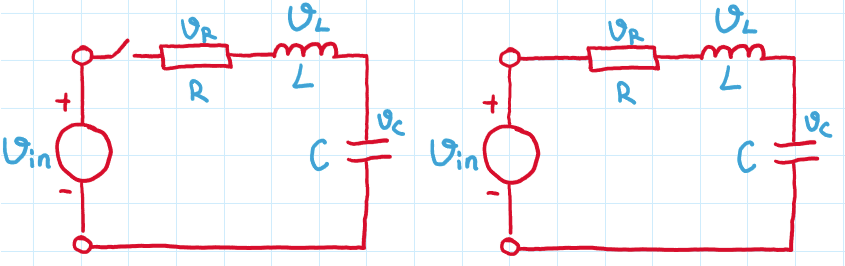

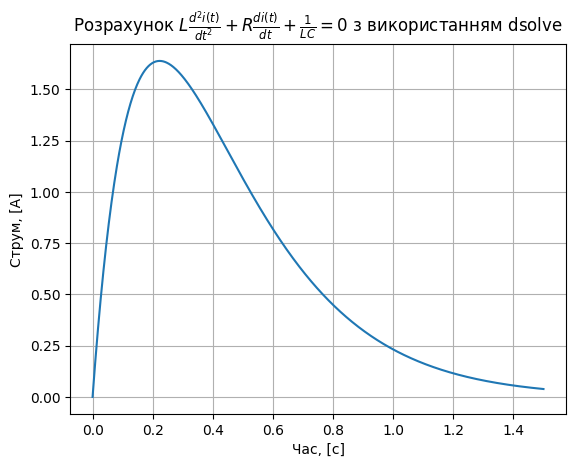

In [53]:
# Step 1: Define circuit parameters and initial conditions
R = 9  # Resistance (in ohms)
L = 1  # Inductance (in henrys)
C = 0.05  # Capacitance (in farads)
V = 20   # Applied DC voltage (in volts)

t = smp.symbols('t')  # Time symbol
I = smp.Function('I')(t)  # Current through the circuit

# Step 2: Set up the differential equation
eq = L * I.diff(t, 2) + R * I.diff(t) + 1/C * I
# Initial conditions (I(0) = 0, di/dt(0) = 0)
ics = {I.subs(t, 0): 0, L*smp.diff(I, t).subs(t, 0): V}

# Step 3: Solve the differential equation
sol = smp.dsolve(eq, I, ics=ics)

# Step 4: Convert symbolic solution to a callable function
I_func = smp.lambdify(t, sol.rhs, 'numpy')

# Step 5: Generate a range of time values
time_values = np.linspace(0, 1.5, 1000)  # Adjust the range as needed

# Step 6: Evaluate I(t) for each time point
current_values = np.array([I_func(ti) for ti in time_values])

# Step 7: Plot the graph
plt.plot(time_values, current_values)
plt.title('Розрахунок $ L\\frac{d^{2}i(t)}{dt^{2}} + R\\frac{di(t)}{dt} + \\frac{1}{LC} = 0 $ з використанням dsolve')
plt.xlabel('Час, [c]')
plt.ylabel('Струм, [A]')
plt.grid(True)
plt.show()

In [54]:
eq

20.0*I(t) + 9*Derivative(I(t), t) + Derivative(I(t), (t, 2))

In [55]:
ics

{I(0): 0, Subs(Derivative(I(t), t), t, 0): 20}

In [56]:
sol

Eq(I(t), -20.0*exp(-5.0*t) + 20.0*exp(-4.0*t))

<img src="Separator.png" alt="drawing"/>

### Приклад розрахунку тригонометричного ряду Фурьє

2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 - sin(6*t)/3 + 2*sin(7*t)/7


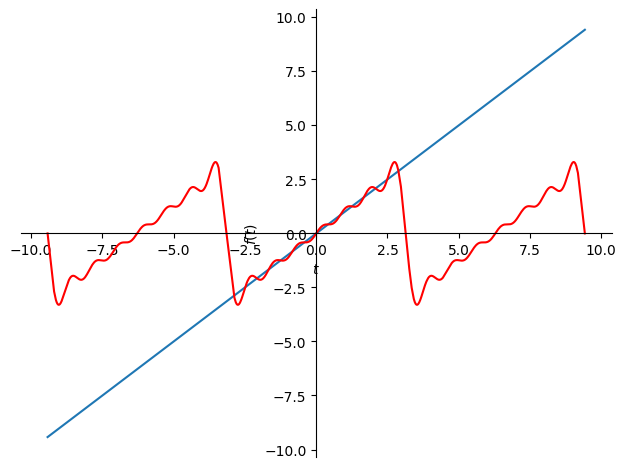

In [50]:
import sympy as smp
i2pi = smp.I*2*smp.pi
exp = smp.exp

def f(t):
    return t

def a0():
    return 1/T*smp.integrate(
        f(t),
        (t, t0, t0 + T))

def a(n):
    return 2/T*smp.integrate(
        f(t)*smp.cos(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def b(n):
    return 2/T*smp.integrate(
        f(t)*smp.sin(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def S(N):
    return a0()+sum( a(n)*smp.cos(n*t*2*smp.pi/T)+b(n)*smp.sin(n*t*2*smp.pi/T) for n in range(1, N+1)).expand(complex=True).simplify()
        
T = 2*smp.pi
t0 = -smp.pi

t = smp.Symbol('t', real=True)

N = 7

analytic_approx = S(N).expand()
print(analytic_approx)

interval = (t, t0-T, t0+2*T)

### Тригонометричний ряд Фур'є
p1 = smp.plot(f(t), interval, show=False)
p2 = smp.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

## Використання PySpice

### Активний ФНЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

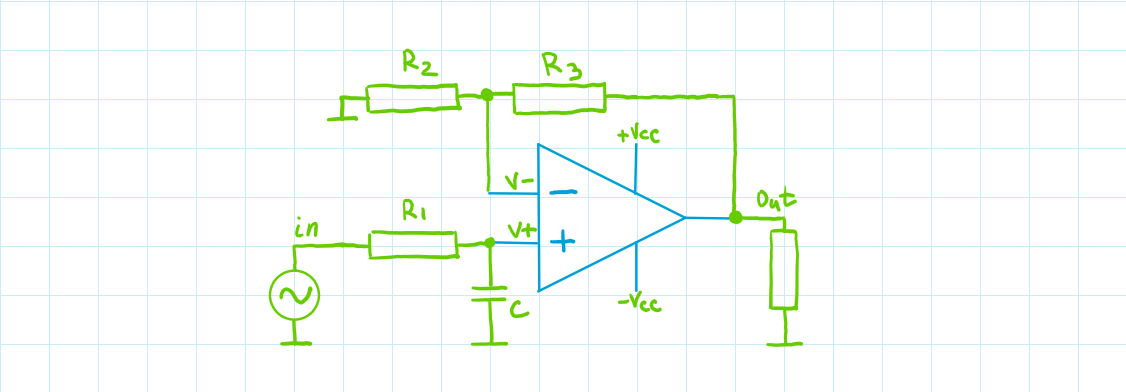

In [37]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Low pass filter')
    circuit.include("uA741.lib")
    
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    circuit.SinusoidalVoltageSource('Vsin', 'inp', circuit.gnd, offset=1, amplitude=0.1, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', 'inp',         R1_sb@u_kΩ)
    circuit.C(1, 'v+', circuit.gnd,  C_sb@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 100@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФНЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['inp'], axis=axe1)
    axe1.set_ylim(-1, 3)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-1, 4)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…

---
### Активний ФВЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

In [38]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Op-amp circuits - Example 1 Non-inverting op-amp Amplifier')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    source = circuit.SinusoidalVoltageSource('in', 'inp', circuit.gnd, offset=1, amplitude=0.5, frequency=F_sb@u_kHz)
    #source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=1@u_V, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', circuit.gnd, R1_sb@u_kΩ)
    circuit.C(1, 'v+', 'inp',        10000@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФВЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['inp'], axis=axe1)
    axe1.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…